In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import all the necessary libraries

In [0]:
import glob
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import sklearn.metrics as metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report

Loading dataset paths

In [0]:
#Storing all path address into a list in order to fetch images
files = glob.glob("/content/gdrive/My Drive/VR/Project - Face recognition/AVR_data/**/*.jpg")
paths = []
names = []

# Separating label names from path in order to make a target list of labels
for file in files:
  label_str = file.split("/")[-2]
  paths.append(file)
  names.append(label_str)

Image Preprocessing for converting image into standard form.

In [0]:
def preprocess(image):

  #Converting image into grayscale
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

  #Resizing all images to 64x64 dimensions
  standard_im = cv2.resize(gray, (64, 64))
  
  return standard_im

Label Encoding - To convert names of images into numbers for applying machine learning Model.

In [0]:
label_encoder = preprocessing.LabelEncoder() 
names= label_encoder.fit_transform(names) 

Loading Images into list

In [0]:
data = []
for path in paths:

  #Reading images using imread function of opencv
  img = cv2.imread(path)

  #preprocess images into standard form
  pre = preprocess(img)
  
  data.append(pre)

Converting images into numpy array for further processing

In [0]:
X = np.asarray(data)
print("Shape of dataset : ",X.shape)

Shape of dataset :  (710, 64, 64)


Reshaping the array or flattening images into 1 Dimensional array for making a matrix of dimension nxd (n = number of images in dataset and d = w*h dimension of 1d image array)

In [0]:
X = X.reshape(X.shape[1]*X.shape[2],X.shape[0])

Splitting dataset into train and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.T, names, test_size=0.2, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (568, 4096)
y_train shape:(568,)


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Distribution of training dataset knowing how many samples are there per person (class)

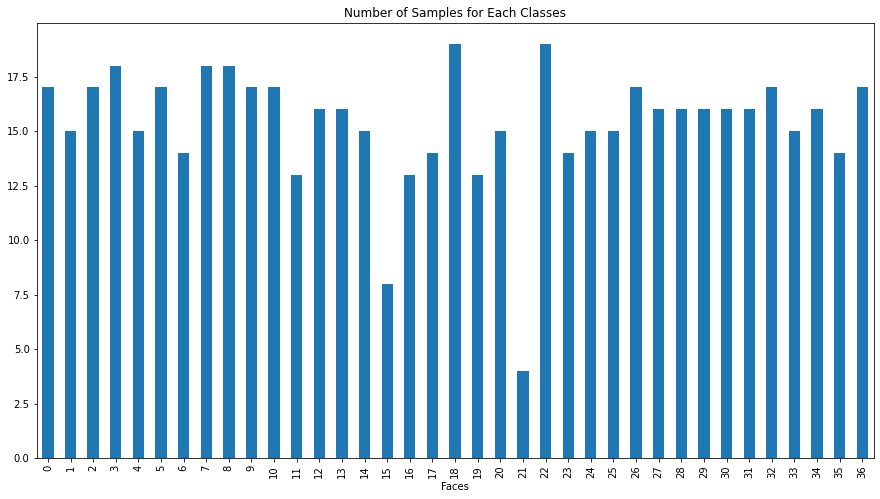

In [0]:
y_frame=pd.DataFrame()
y_frame['Faces']=y_train
y_frame.groupby(['Faces']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

Fitting Linear Discriminant model

In [0]:
lda = LDA(n_components=2)
lda.fit(X.T,names)
X_lda=lda.transform(X.T)

Finding necessary n_components

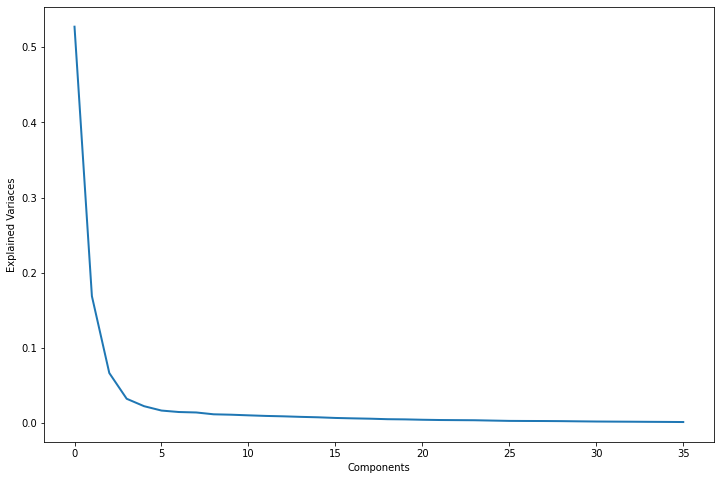

In [0]:
lda=LDA()
lda.fit(X.T,names)

plt.figure(1, figsize=(12,8))

plt.plot(lda.explained_variance_ratio_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

Transforming them using lda

In [0]:
#we can figure out from plot above that 3 components can give us better results
n_components = 3
lda=LDA(n_components=n_components)

#fit
lda.fit(X_train,y_train)

#transform
X_train_lda=lda.transform(X_train)
X_test_lda=lda.transform(X_test)

Applying model and finding out final accuracy

In [0]:
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       0.75      1.00      0.86         3
           3       1.00      0.50      0.67         2
           4       0.33      0.40      0.36         5
           5       1.00      1.00      1.00         1
           6       1.00      0.33      0.50         6
           7       0.25      0.50      0.33         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       0.50      0.33      0.40         3
          11       0.57      0.57      0.57         7
          12       0.75      1.00      0.86         3
          13       0.67      0.50      0.57         4
          14       0.71      1.00      0.83         5
          15       0.33      0.33      0.33         3
          16       0.83      0.71      0.77         7
          17       0.60    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
